<a href="https://colab.research.google.com/github/XueqingWu/Interpretable_ML/blob/main/Interpretable_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpretable Machine Learning Models

Reference for dataset:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [3]:
pip install pygam

In [6]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, GammaGAM, s
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import datasets
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## EDA

### Missing Values

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Data Transformation

In [10]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [11]:
# transromm the churn column to binary
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


In [12]:
# Convert total charges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# Fill the null values with the 0
df["TotalCharges"].fillna(0, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
# get the unique value for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2


In [14]:
# Exclude the columns that are not needed for the analysis
Data = df.drop(columns=["customerID"])
# One-hot encoding for categorical variables
Data = pd.get_dummies(Data, drop_first=True)

In [15]:
Data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [16]:
Data.isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0


### Data Exploratory

<ipython-input-17-484ea305d4ee>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-17-484ea305d4ee>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-17-484ea305d4ee>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-17-484ea305d4ee>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-17-484ea305d4ee>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-17-484ea305d4ee>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

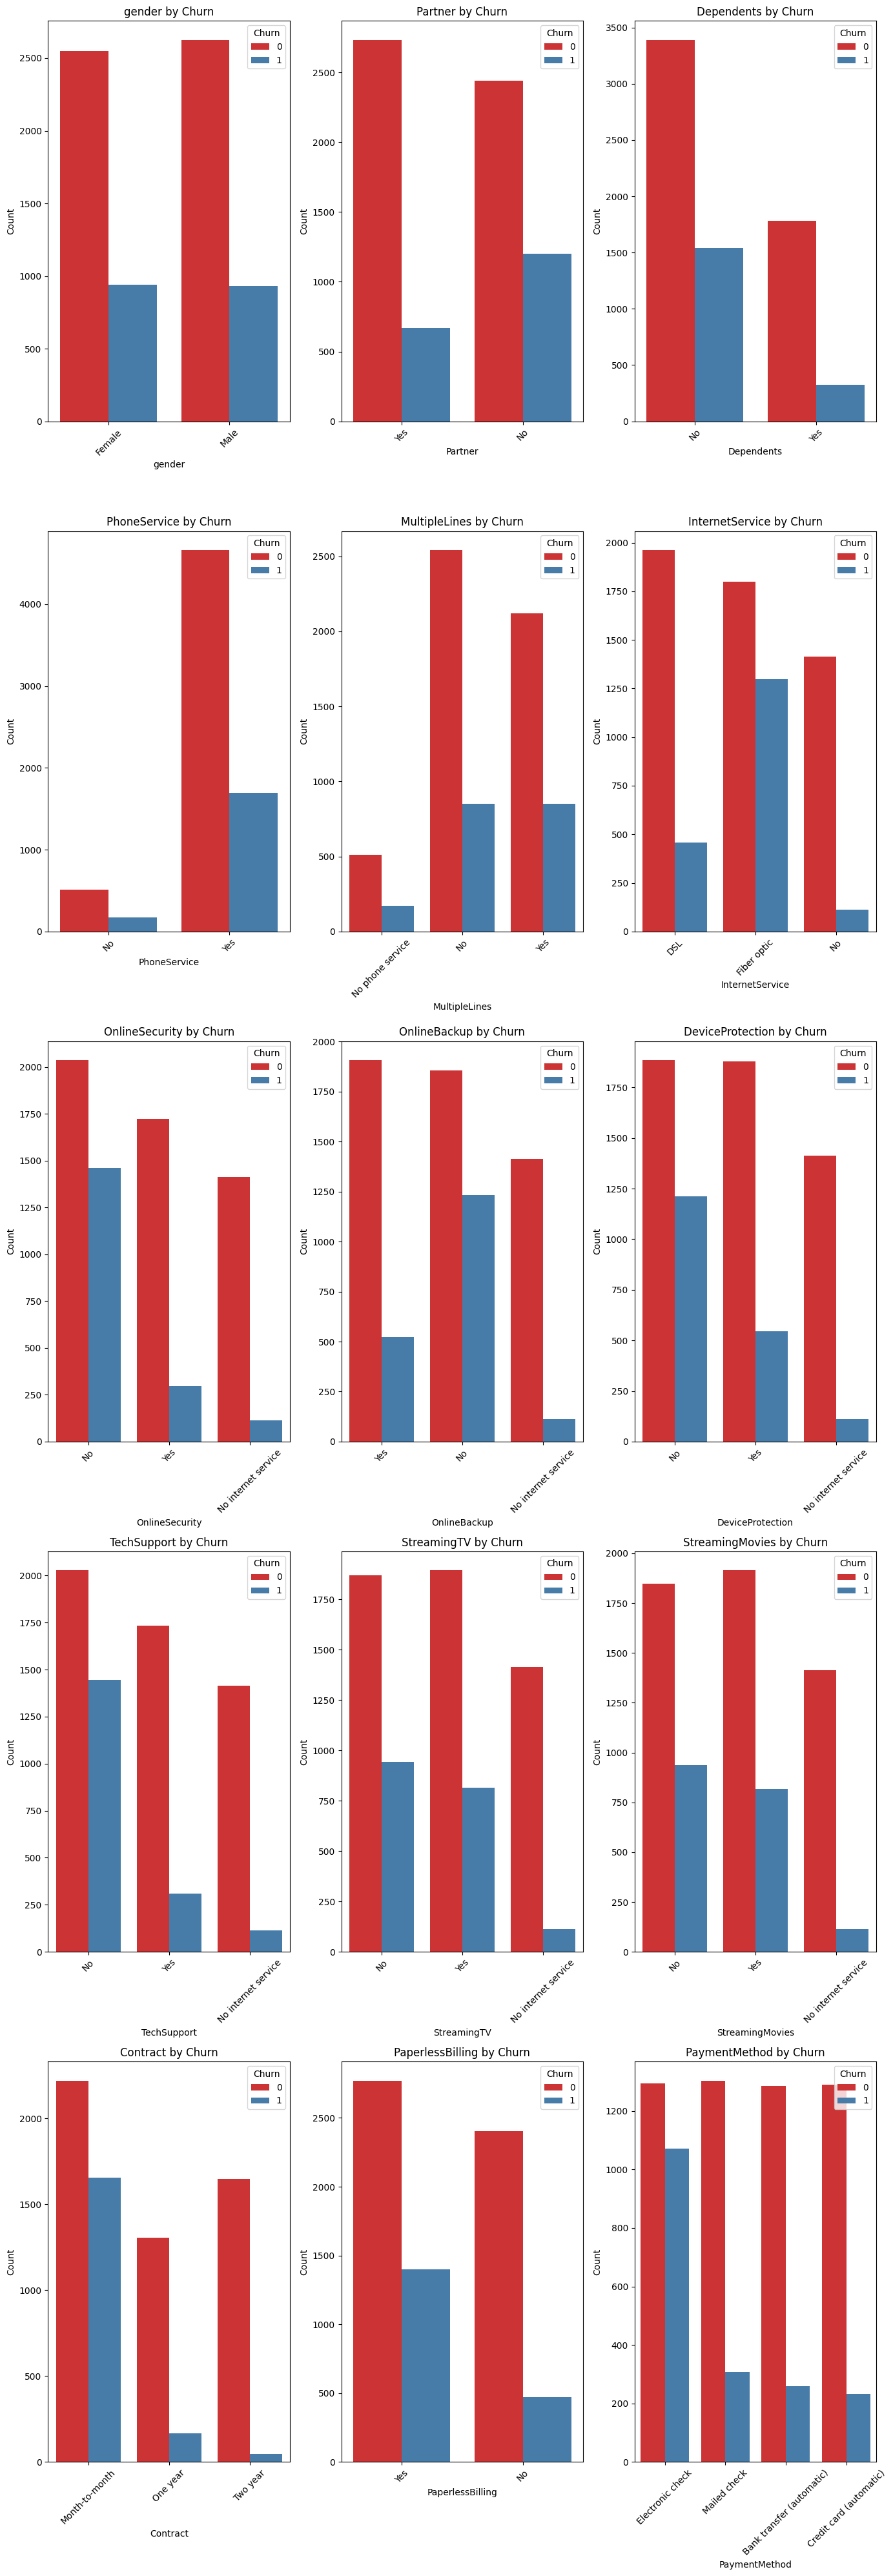

In [17]:
# Select categorical columns, excluding 'Churn' and 'customerID'
categorical_cols = [
    col
    for col in df.select_dtypes(include=["object"]).columns
    if col not in ["Churn", "customerID"]
]

# Set up the subplots grid (adjust rows and cols based on the number of graphs you want to show)
fig, axes = plt.subplots(
    nrows=5, ncols=3, figsize=(14, 40)
)  # Adjust nrows and ncols as needed

# Flatten axes to iterate over them in a loop
axes = axes.flatten()

# Loop through categorical columns and plot them in subplots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="Churn", palette="Set1", ax=axes[i])
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_ylabel("Count")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

* The Churn is significantly lower than non-churn.

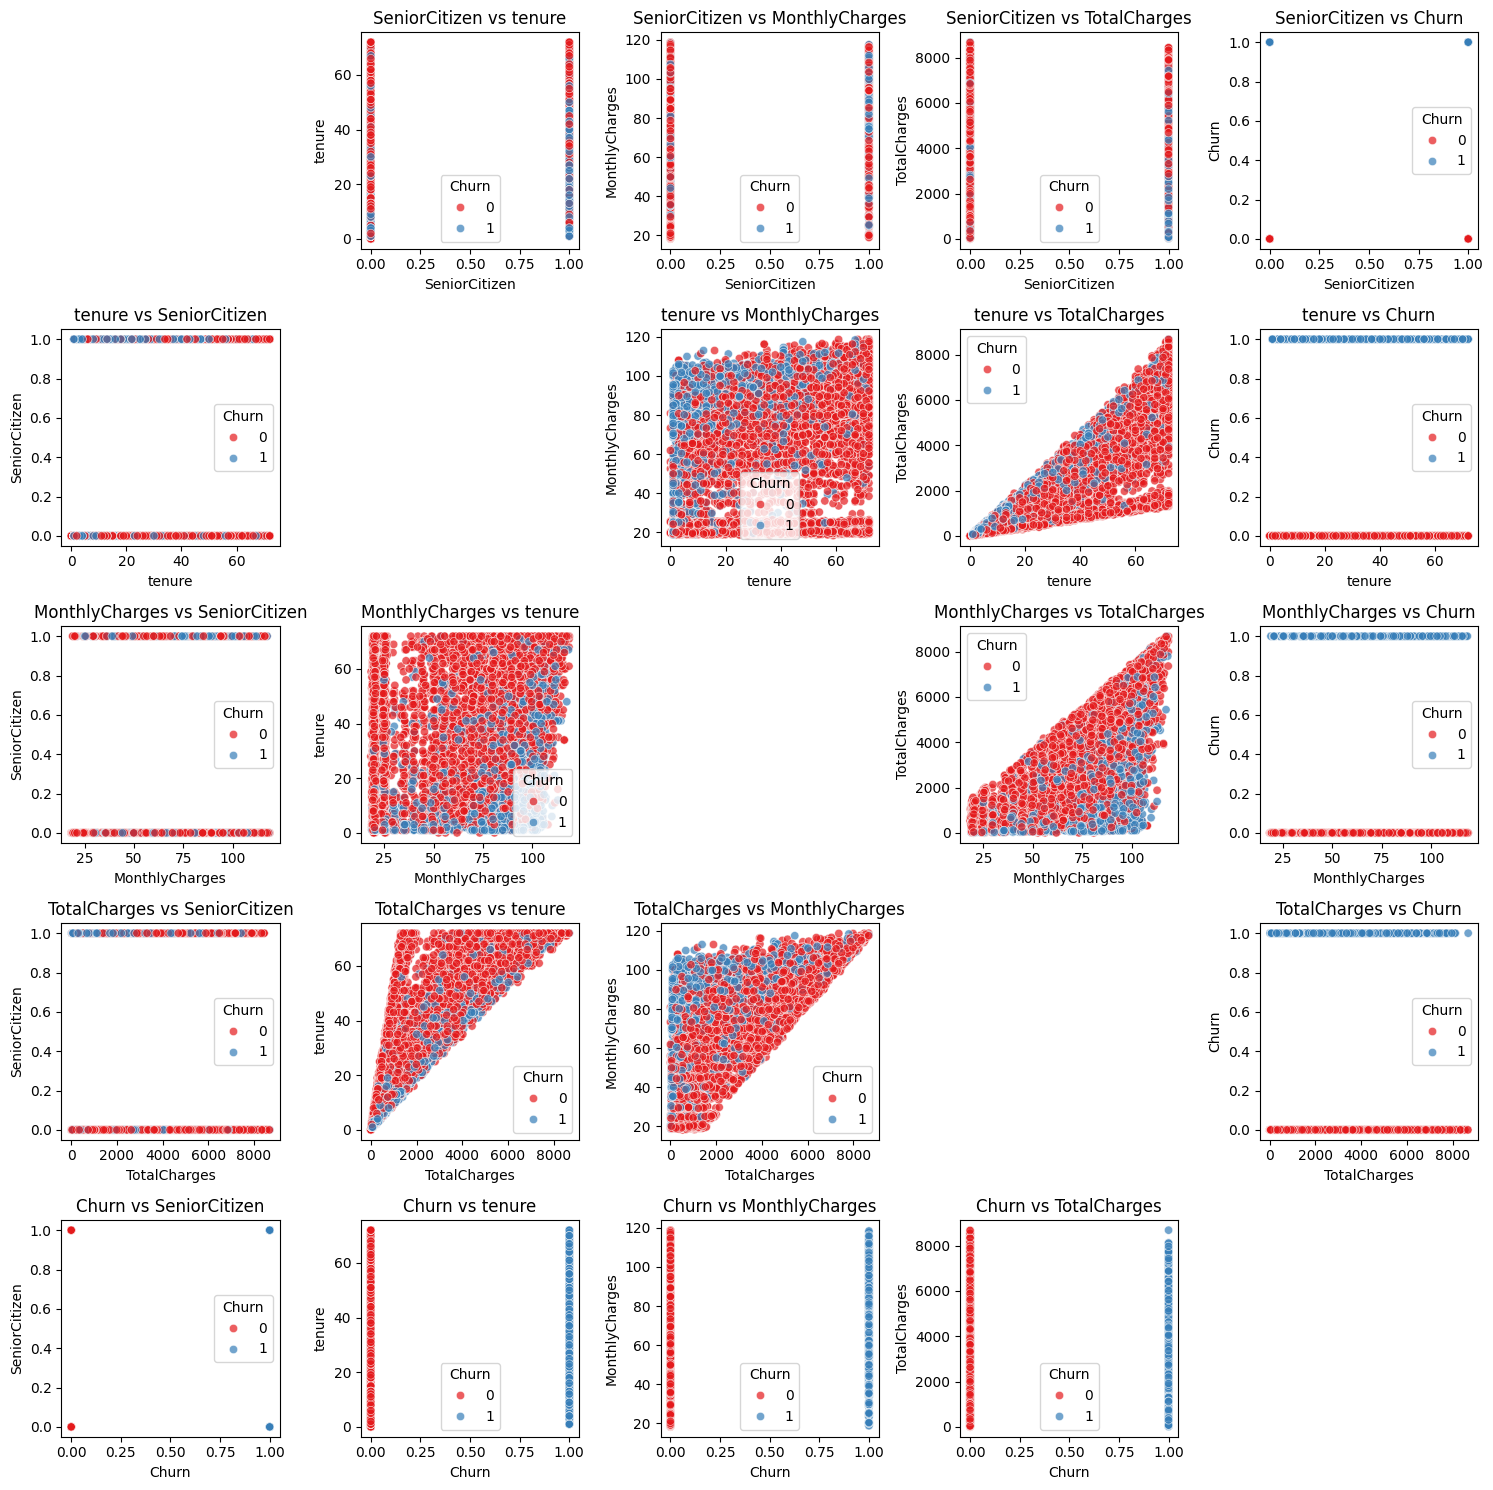

In [18]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Number of numeric columns
num_cols = len(numeric_cols)

# Set up the subplots grid
fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(15, 15))

# Loop through the numeric columns to create scatter plots
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i != j:  # To avoid diagonal plots
            sns.scatterplot(
                data=df,
                x=col1,
                y=col2,
                hue="Churn",
                palette="Set1",
                alpha=0.7,
                ax=axes[i, j],
            )
            axes[i, j].set_title(f"{col1} vs {col2}")
        else:
            # Remove the diagonal (where i == j)
            axes[i, j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

* According to the graph, there are no influential outliers.
* There's no perfect separations

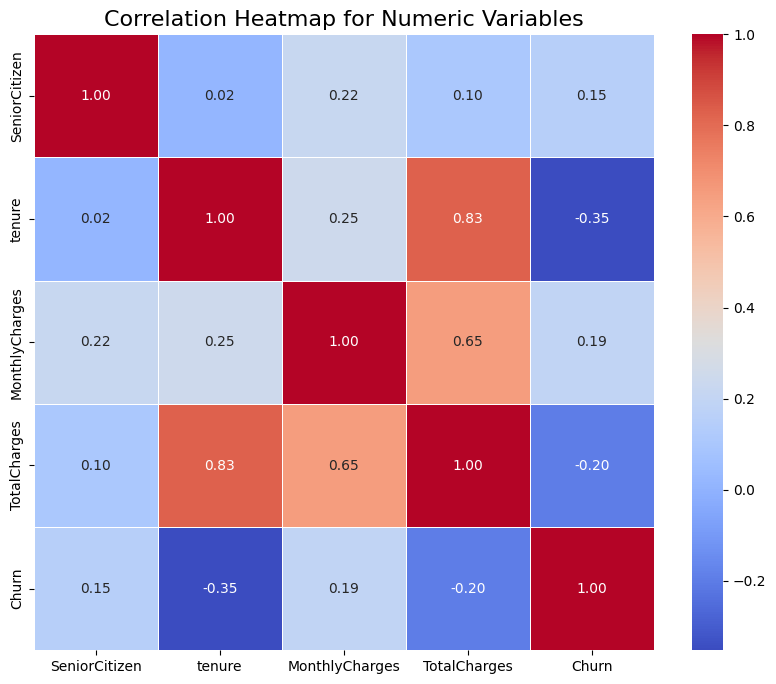

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Calculate the correlation matrix for numeric variables
corr_matrix = numeric_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap for Numeric Variables", fontsize=16)

# Show the plot
plt.show()

According to the graph, total charges and monthly charges are highly correlated. Besides, total charges are highly correlated with tenure. This violates the assumption of multicolinearity. Hence, the total charges will be dropped in the dataset.

In [20]:
# drop total charges
Data = Data.drop(columns=["TotalCharges"])

In [21]:
# Split the data into training and testing data and features and target variable
X = Data.drop(columns=["Churn"])
y = Data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Scale the parameters
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

### Linear Regression Model

Reference for linear regression model: https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/regression-interpretability.ipynb

In [23]:
# Build linear regression model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")

    return model, y_pred

In [24]:
# Fit models
lr_model, lr_pred = evaluate_model(
    LinearRegression(),
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    "Linear Regression",
)


Linear Regression:
MSE: 0.14
R2 Score: 0.30
SeniorCitizen: 0.0141
tenure: -0.1096
MonthlyCharges: -0.1688
gender_Male: -0.0047
Partner_Yes: 0.0031
Dependents_Yes: -0.0098
PhoneService_Yes: 0.0075
MultipleLines_No phone service: -0.0075
MultipleLines_Yes: 0.0328
InternetService_Fiber optic: 0.1359
InternetService_No: -0.0157
OnlineSecurity_No internet service: -0.0157
OnlineSecurity_Yes: -0.0205
OnlineBackup_No internet service: -0.0157
OnlineBackup_Yes: -0.0064
DeviceProtection_No internet service: -0.0157
DeviceProtection_Yes: 0.0057
TechSupport_No internet service: -0.0157
TechSupport_Yes: -0.0167
StreamingTV_No internet service: -0.0157
StreamingTV_Yes: 0.0397
StreamingMovies_No internet service: -0.0157
StreamingMovies_Yes: 0.0487
Contract_One year: -0.0440
Contract_Two year: -0.0311
PaperlessBilling_Yes: 0.0222
PaymentMethod_Credit card (automatic): -0.0021
PaymentMethod_Electronic check: 0.0348
PaymentMethod_Mailed check: -0.0054


#### Check Assumptions

##### Linearity

Text(0.5, 1.0, 'Linear Regression: Residuals vs Predicted')

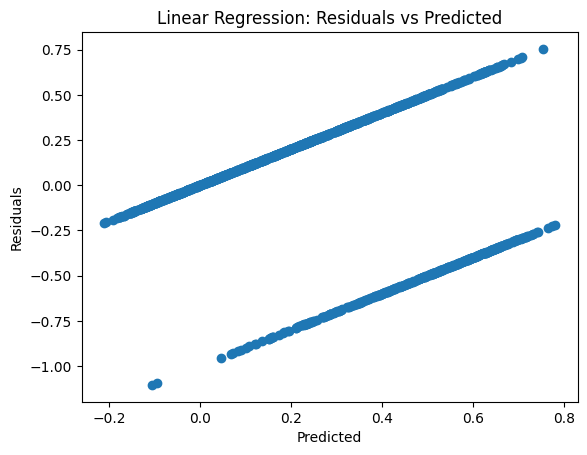

In [25]:
## Check linearity assumption for Linear Regression
plt.scatter(lr_pred, lr_pred - y_test)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals vs Predicted")

##### Independence of Errors

In [26]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(lr_pred - y_test)
print(f"Durbin-Watson statistic: {dw_test}")

Durbin-Watson statistic: 1.8969749200044035


Since the Durbin-Watson statistic is around 2, there is no autocorrelation. The errors are independent.

##### Homoscedasticity

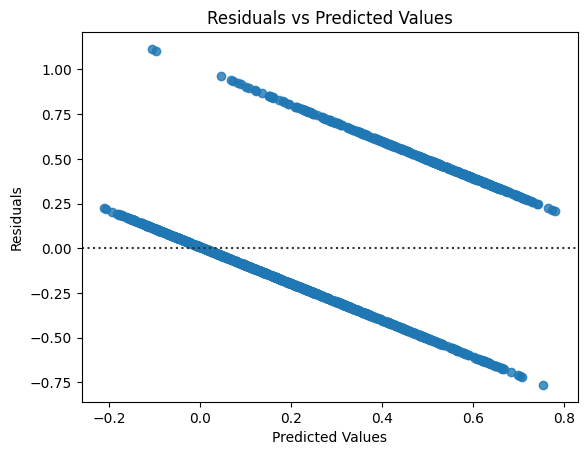

In [27]:
# Plot residuals vs predicted values
sns.residplot(x=lr_pred, y=y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

##### Normality of Errors

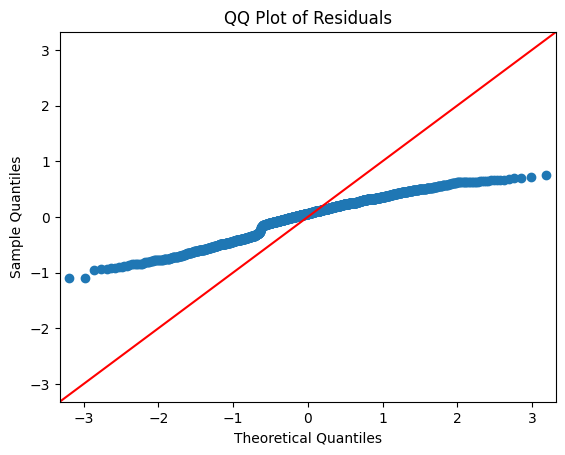

In [28]:
# Create qq plot for residuals
# Create QQ plot for residuals
sm.qqplot(lr_pred - y_test, line="45")
plt.title("QQ Plot of Residuals")
plt.show()

##### Multicolinearity

Assumption fulfilled:
* Multicolinearity (EDA)
* Independence of errors
* Linearity


Assumption not fulfilled:
* Homoscedacitisity
* Normality of errors

Hence, linear regression is not a suitable model.

### Model Interpretability
Take the tenure as an example, for every unit the tenure is increasing, the likelihood that the user is going to churn decreases by 0.1119. If the user is male, the user is 0.0046 less likely to churn.

### Logistic Regression

In [29]:
# build a logistic model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [30]:
# logistic model results
print("Logistic Regression Results:")
print("Accuracy:", log_model.score(X_test_scaled, y_test))
# print MSE, R2 score, and coefficients
log_mse = mean_squared_error(y_test, y_pred_log)
log_r2 = r2_score(y_test, y_pred_log)
print(f"MSE: {log_mse:.2f}")
print(f"R2 Score: {log_r2:.2f}")
# print coefficients
for feature, coef in zip(X.columns, log_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Logistic Regression Results:
Accuracy: 0.8197303051809794
MSE: 0.18
R2 Score: 0.07
SeniorCitizen: 0.0596
tenure: -0.7978
MonthlyCharges: -0.5381
gender_Male: -0.0257
Partner_Yes: 0.0276
Dependents_Yes: -0.0792
PhoneService_Yes: -0.0239
MultipleLines_No phone service: 0.0239
MultipleLines_Yes: 0.1852
InternetService_Fiber optic: 0.6544
InternetService_No: -0.0728
OnlineSecurity_No internet service: -0.0728
OnlineSecurity_Yes: -0.1471
OnlineBackup_No internet service: -0.0728
OnlineBackup_Yes: -0.0250
DeviceProtection_No internet service: -0.0728
DeviceProtection_Yes: 0.0448
TechSupport_No internet service: -0.0728
TechSupport_Yes: -0.1081
StreamingTV_No internet service: -0.0728
StreamingTV_Yes: 0.1992
StreamingMovies_No internet service: -0.0728
StreamingMovies_Yes: 0.2513
Contract_One year: -0.2678
Contract_Two year: -0.6040
PaperlessBilling_Yes: 0.1625
PaymentMethod_Credit card (automatic): -0.0362
PaymentMethod_Electronic check: 0.1550
PaymentMethod_Mailed check: 0.0054


Assumptions fulfilled:
* No multicolinearity (see EDA)
* Independence of observations (Domain knoledge)
* Large sample size
* Absence of perfect separation.

Assumptions not fulfilled:
* None


### Interpretation

For every unit tenure increases, the odds ratio of churn changes by exp(-0.7978)=0.45. If the customer is male, the odds ratio change by exp(-0.0257)=0.97.

### GAM

Reference for GAM: https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/generalized-models-interpretability.ipynb

In [31]:
# Subset X to include only the features that are significant
X_subset = X[["tenure", "MonthlyCharges", "gender_Male", "Contract_One year"]]
X_subset_train, X_subset_test, y_train, y_test = train_test_split(
    X_subset, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_subset_train_scaled = scaler.fit_transform(X_subset_train)
X_subset_test_scaled = scaler.transform(X_subset_test)

In [32]:
X_subset_train

,tenure,MonthlyCharges,gender_Male,Contract_One year
2142,21,64.85,False,True
1623,54,97.20,False,False
6074,1,23.45,True,False
1362,4,70.20,True,False
6754,0,61.90,True,False
...,...,...,...,...
3772,1,95.00,True,False
5191,23,91.10,False,False
5226,12,21.15,True,False
5390,12,99.45,True,False


In [33]:
# Initilize GAM
gam = LinearGAM(s(0) + s(1) + s(2) + s(3))

# Find best smoothing parameters for each spline term
gam.gridsearch(X_subset_train_scaled, y_train)

# Fit the model
gam.fit(X_subset_train_scaled, y_train)

# Make predictions
y_pred_gam = gam.predict(X_subset_test_scaled)

# Calculate MSE and R^2
mse_gam = mean_squared_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)

print(f"GAM MSE: {mse_gam:.4f}, R^2: {r2_gam:.4f}")

gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


GAM MSE: 0.1412, R^2: 0.2743
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     23.1518
Link Function:                     IdentityLink Log Likelihood:                                -13322.6046
Number of Samples:                         5634 AIC:                                            26693.5127
                                                AICc:                                           26693.7294
                                                GCV:                                                0.1496
                                                Scale:                                              0.1485
                                                Pseudo R-Squared:                                   0.2416
Feature 

<ipython-input-33-3b14236e321f>:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### Assumptions

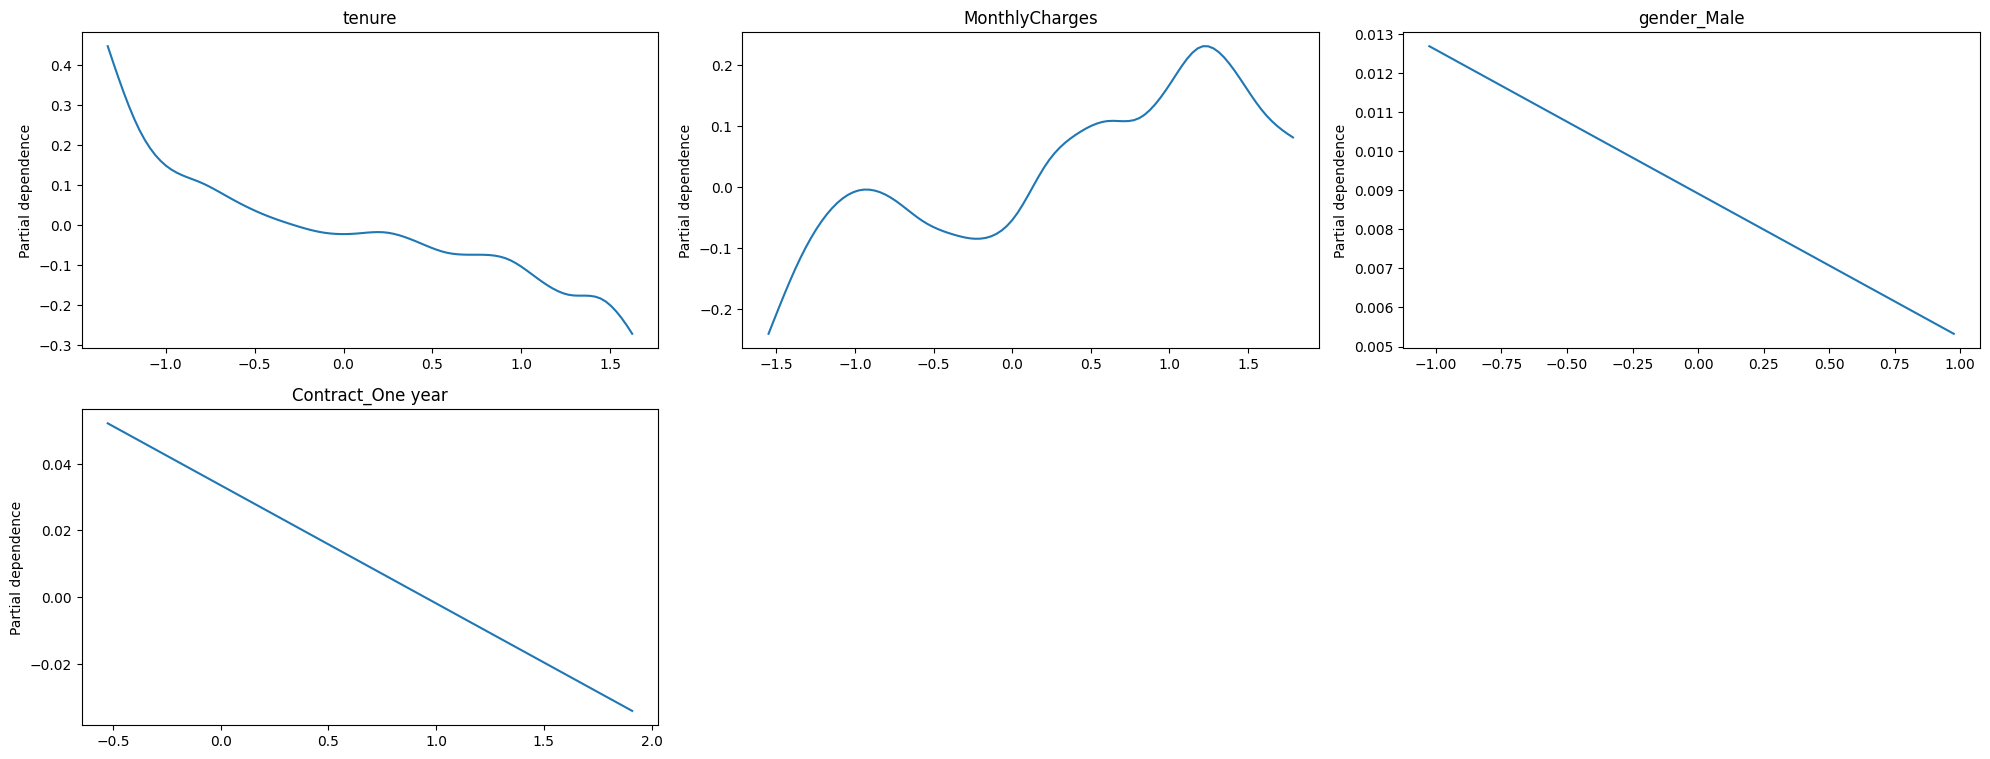

In [34]:
# Visualize GAM
plt.figure(figsize=(20, 15))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(4, 3, i + 1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.title(X_subset_train.columns[i])
    plt.ylabel("Partial dependence")
plt.tight_layout()
plt.show()

The relationship is not linear for tenue and Monthly charges.

### Interpretation
the gender and and whether the contract is one year has a linear relationship.

## Model Comparison

The model performance is roughly the same for all three models. The linear regression and GAM does not fully fulfill the assumptions. The linear regression has the best interpretability, logistic regression has the second highest interpretability, and the GAM has the lowest interpretability. Hence, the logistic regression is chosen for as the optimal model in this case.